In [171]:
import pyarrow
import gc
import pyarrow.parquet as pq
import pandas as pd
import pickle

import numpy as np
import seaborn as sns
#import geopandas as gpd
import matplotlib.pyplot as plt
#from geopy.distance import great_circle, distance
from sklearn.cluster import KMeans
from scipy import stats
from tqdm import tqdm

import random

#import folium
import json
import os
#from folium import plugins
#from folium.plugins import HeatMap

import datetime
from pytz import timezone
from argparse import ArgumentParser
from glob import glob

In [269]:
city = 'LA'
NUM_COLORS = 15
CLUSTER_NUM = 10
CLUSTER_NUM = CLUSTER_NUM - 1

data_folder = '/tank/users/sirishar/analyze/data/'

input_mobility_dec = glob(data_folder + 'dec' + '_' + city + '_' + str(NUM_COLORS) + '/'+ 'cluster_checkin_events_*.csv')[0]
input_infections_dec = glob(data_folder + 'dec' + '_' + city + '_' + str(NUM_COLORS) + '/'+ 'cluster_inf_events_*.csv')[0]
input_risk_dec = glob(data_folder + 'dec' + '_' + city + '_' + str(NUM_COLORS) + '/'+ 'risk.csv')[0]

input_mobility_jan = glob(data_folder + 'jan' + '_' + city + '_' + str(NUM_COLORS) + '/'+ 'cluster_checkin_events_*.csv')[0]
input_infections_jan = glob(data_folder + 'jan' + '_' + city + '_' + str(NUM_COLORS) + '/'+ 'cluster_inf_events_*.csv')[0]
input_risk_jan = glob(data_folder + 'jan' + '_' + city + '_' + str(NUM_COLORS) + '/'+ 'risk.csv')[0]

input_mobility_mar = glob(data_folder + 'mar' + '_' + city + '_' + str(NUM_COLORS) + '/'+ 'cluster_checkin_events_*.csv')[0]
input_infections_mar = glob(data_folder + 'mar' + '_' + city + '_' + str(NUM_COLORS) + '/'+ 'cluster_inf_events_*.csv')[0]
input_risk_mar = glob(data_folder + 'mar' + '_' + city + '_' + str(NUM_COLORS) + '/'+ 'risk.csv')[0]


In [270]:
infections_dec = pd.read_csv(input_infections_dec)
mobility_dec = pd.read_csv(input_mobility_dec)
risk_dec = pd.read_csv(input_risk_dec, header=None)

infections_jan = pd.read_csv(input_infections_jan)
mobility_jan = pd.read_csv(input_mobility_jan)
risk_jan = pd.read_csv(input_risk_jan, header=None)

infections_mar = pd.read_csv(input_infections_mar)
mobility_mar = pd.read_csv(input_mobility_mar)
risk_mar = pd.read_csv(input_risk_mar, header=None)

# Plot infections

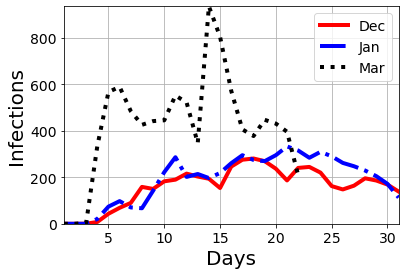

In [299]:
fig,ax = plt.subplots(1)

days_dec = np.arange(1,32)
days_jan = np.arange(1,32)
days_mar = np.arange(1,len(infections_mar[str(CLUSTER_NUM)])+1)

# Average
plt.plot(days_dec, infections_dec.values[:,1:].mean(axis=1), linestyle='-', lw=4, color='red')
plt.plot(days_jan, infections_jan.values[:,1:].mean(axis=1), linestyle='-.' , lw=4, color='blue')
plt.plot(days_mar, infections_mar.values[:,1:].mean(axis=1), linestyle=':' , lw=4,  color='black')

# Specific
#plt.plot(days_dec, infections_dec[str(CLUSTER_NUM)], linestyle='-', lw=4, color='red')
#plt.plot(days_jan, infections_jan[str(CLUSTER_NUM)], linestyle='-.' , lw=4, color='blue')
#plt.plot(days_mar, infections_mar[str(CLUSTER_NUM)], linestyle=':' , lw=4,  color='black')

plt.legend(['Dec', 'Jan', 'Mar'], fontsize=14)

plt.xlabel('Days', size = 20)
plt.ylabel('Infections', size=20)
plt.xticks(size = 14)
plt.yticks(size = 14)



plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=9)
plt.grid()

ax.autoscale(enable=True, axis='both', tight=True)
#ax.autoscale_view()

# plot Risk

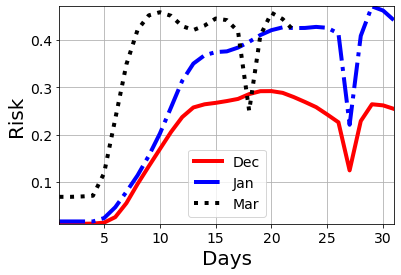

In [303]:
fig,ax = plt.subplots(1)

# Specific
#plt.plot(days_dec, risk_dec.loc[CLUSTER_NUM], linestyle='-', lw=4, color='red')
#plt.plot(days_jan, risk_jan.loc[CLUSTER_NUM], linestyle='-.' , lw=4, color='blue')
#plt.plot(days_mar, risk_mar.loc[CLUSTER_NUM], linestyle=':' , lw=4,  color='black')

# Average
plt.plot(days_dec, risk_dec.mean(), linestyle='-', lw=4, color='red')
plt.plot(days_jan, risk_jan.mean(), linestyle='-.' , lw=4, color='blue')
plt.plot(days_mar, risk_mar.mean(), linestyle=':' , lw=4,  color='black')

plt.legend(['Dec', 'Jan', 'Mar'], fontsize=14)


plt.xlabel('Days', size = 20)
plt.ylabel('Risk', size=20)
plt.xticks(size = 14)
plt.yticks(size = 14)



plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=9)
plt.grid()

ax.autoscale(enable=True, axis='both', tight=True)


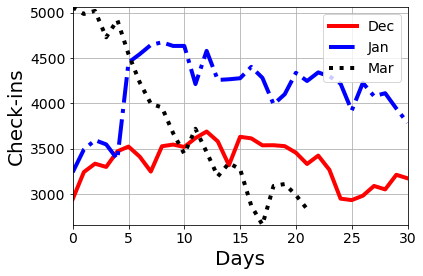

In [301]:
fig,ax = plt.subplots(1)


# Specific
# total_mob_dec = mobility_dec[mobility_dec['Unnamed: 0']==CLUSTER_NUM].iloc[0].values[2:] #+ \
#            #     mobility_dec[mobility_dec['Unnamed: 0']==CLUSTER_NUM].iloc[1].values[2:] + \
#            #     mobility_dec[mobility_dec['Unnamed: 0']==CLUSTER_NUM].iloc[2].values[2:] 

# total_mob_jan = mobility_jan[mobility_jan['Unnamed: 0']==CLUSTER_NUM].iloc[0].values[2:] #+ \
#                # mobility_jan[mobility_jan['Unnamed: 0']==CLUSTER_NUM].iloc[1].values[2:] + \
#                # mobility_jan[mobility_jan['Unnamed: 0']==CLUSTER_NUM].iloc[2].values[2:] 

# total_mob_mar = mobility_mar[mobility_mar['Unnamed: 0']==CLUSTER_NUM].iloc[0].values[2:] #+ \
#               #  mobility_mar[mobility_mar['Unnamed: 0']==CLUSTER_NUM].iloc[1].values[2:] + \
#               #  mobility_mar[mobility_mar['Unnamed: 0']==CLUSTER_NUM].iloc[2].values[2:] 

# plt.plot(days_dec, total_mob_dec, linestyle='-', lw=4, color='red')
# plt.plot(days_jan, total_mob_jan, linestyle='-.' , lw=4, color='blue')
# plt.plot(days_mar, total_mob_mar, linestyle=':' , lw=4,  color='black')


# # Avegrage
plt.plot(mobility_dec[mobility_dec['Mobility type']=='self_traffic'].mean().values[1:], linestyle='-', lw=4, color='red')
plt.plot(mobility_jan[mobility_jan['Mobility type']=='self_traffic'].mean().values[1:], linestyle='-.' , lw=4, color='blue')
plt.plot(mobility_mar[mobility_mar['Mobility type']=='self_traffic'].mean().values[1:], linestyle=':' , lw=4,  color='black')

plt.legend(['Dec', 'Jan', 'Mar'], fontsize=14)


plt.xlabel('Days', size = 20)
plt.ylabel('Check-ins', size=20)
plt.xticks(size = 14)
plt.yticks(size = 14)



plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=9)
plt.grid()

ax.autoscale(enable=True, axis='both', tight=True)


In [305]:
infections_mar.valu

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1583366400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1583452800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1583539200,1.0,43.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,0.0,9.0,0.0
3,1583625600,87.0,403.0,1083.0,114.0,463.0,155.0,48.0,7.0,0.0,263.0,818.0,246.0,350.0,644.0,327.0
4,1583712000,103.0,677.0,406.0,645.0,445.0,255.0,634.0,19.0,118.0,1024.0,630.0,1243.0,582.0,846.0,879.0
5,1583798400,219.0,1049.0,730.0,602.0,545.0,461.0,667.0,8.0,375.0,1002.0,613.0,378.0,418.0,1062.0,707.0
6,1583884800,543.0,702.0,605.0,811.0,541.0,494.0,619.0,18.0,227.0,761.0,223.0,390.0,241.0,993.0,103.0
7,1583971200,228.0,302.0,404.0,290.0,344.0,900.0,180.0,0.0,322.0,814.0,688.0,456.0,152.0,872.0,434.0
8,1584057600,304.0,236.0,566.0,410.0,434.0,694.0,374.0,8.0,216.0,1262.0,352.0,650.0,200.0,758.0,162.0
9,1584144000,560.0,438.0,348.0,330.0,622.0,678.0,534.0,14.0,312.0,960.0,260.0,544.0,302.0,584.0,192.0
